# Clustered dotplots

In [1]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
save_plot <- function(p, fn, w, h){
    for(ext in c(".pdf", ".png", ".svg")){
        ggsave(filename=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

get_xci_enrichment <- function(){
    return(read_tsv("../../_m/xci_enrichment_analysis.txt"))
}

## Get data

In [3]:
xci <- get_xci_enrichment()
xci %>% head(2)


── Column specification ────────────────────────────────────────────────────────
cols(
  `XCI status` = col_character(),
  OR = col_double(),
  PValue = col_double(),
  Direction = col_character(),
  FDR = col_double()
)




XCI status,OR,PValue,Direction,FDR
<chr>,<dbl>,<dbl>,<chr>,<dbl>
escape,192.308432,2.642862e-37,All,1.189288e-36
variable,4.707192,1.956333e-01,All,3.521399e-01


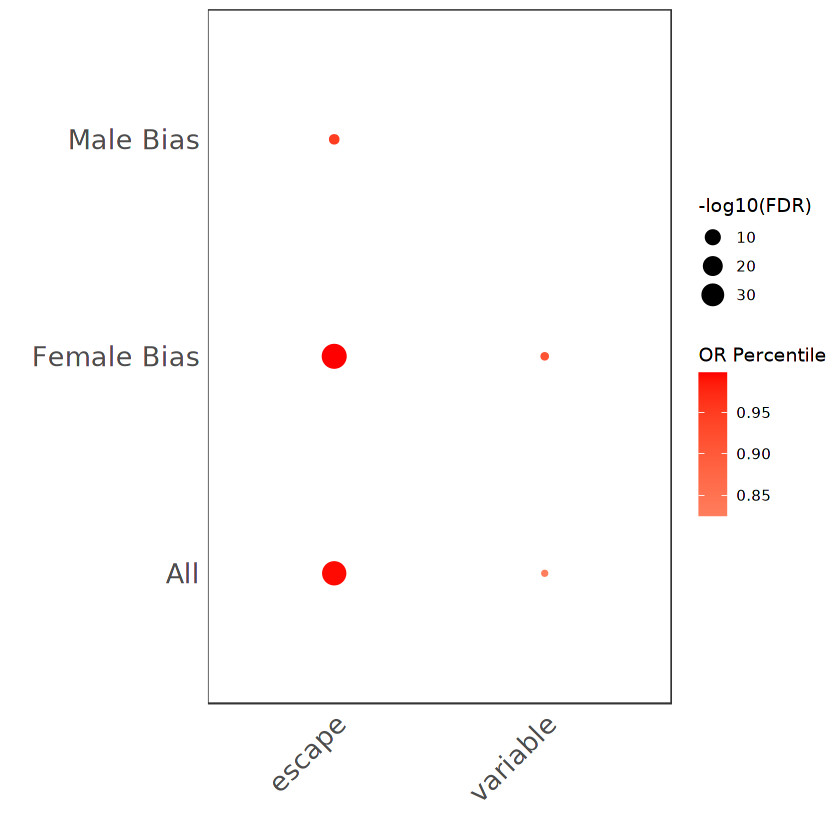

In [4]:
dotplot <- xci %>% mutate_if(is.character, as.factor) %>%
    mutate(`-log10(FDR)` = -log10(FDR), `OR Percentile` = OR / (1+OR)) %>% 
    filter(OR != 0) %>% 
    ggplot(aes(x=`XCI status`, y=Direction, color=`OR Percentile`, 
               size=`-log10(FDR)`)) + 
    geom_point() + ylab('') + xlab('') +
    scale_color_gradient2(midpoint = 0.5, low = "blue", mid = "white",
                          high = "red", space = "Lab" ) +
    theme_bw() + 
    theme(axis.line  = element_blank(), 
          axis.text.x = element_text(angle = 45, hjust=1), 
          axis.text = element_text(size=16), 
          axis.ticks = element_blank(), 
          legend.position="right", 
          panel.grid = element_blank(), 
          strip.text=element_text(size=16, face="bold"))
save_plot(dotplot, "dotplot_enrichment_xci", 5, 4)
dotplot

## Reproducibility Information

In [5]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-07-13 12:44:22 EDT"

   user  system elapsed 
  3.603   0.259   4.238 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-07-13                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source        
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 broom         0.7.8    2021-06-24 [1] CRAN (R 4.0.3)
 Cairo         1.5-12.2 2020-07-07 [1] CRAN (R 4.0.2)
 cellranger    1.1.0    2016-07-27 [1] CRAN (R 